In [1]:
import builtins
import toolz.curried 
class Chain(object):
    imports = [
        builtins,
        toolz.curried
    ]
    def _getter(self, key):
        return pipe(
            self.imports,
            reversed, 
            map(
                lambda imp: getattr(imp, key) if hasattr(imp, key) else None
            ),
            filter(bool),
            list, 
            first,
        )
    def __init__(
        self,
        context=None,
        imports = [],
        lazy = True,
    ):
        self.context = context
        self._tokens = []
        self.imports = pipe(
            concat([self.imports, imports]),
            list
        )  
        
    def __getitem__(self, item):
        self._tokens.append([item, (), {}])
        return self
    
    def __getattr__(self, attr):
        self._tokens.append([self._getter(attr), [], {}])
        return self
    
    def __call__(self, *args, **kwargs):
        self._tokens[-1][1] = args
        self._tokens[-1][2] = kwargs
        return self
    
    @property
    def func(self):
        return compose(
            *pipe(
                self._tokens,
                reversed,
                map(
                    lambda e: partial(
                        e[0], *e[1], **e[2]
                    ) if e[1] or e[2] else e[0],
                )
            ),
        )
            
    def value(self):
        return self.func(self.context)

In [2]:
rootdir = '/Users/Imperssonator/Dropbox/OFET Fab Table/OFET-Database-master/Papers/'

In [3]:
from glob import glob

In [4]:
from toolz.curried import *

In [5]:
import pandas as pd

In [6]:
import operator

In [7]:
operator.

SyntaxError: invalid syntax (<ipython-input-7-b66f304bed25>, line 1)

In [10]:
%matplotlib notebook

In [15]:
!conda install altair --channel conda-forge -y

Fetching package metadata: ......
Solving package specifications: .........

Package plan for installation in environment //anaconda/envs/py35:

The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    libsodium-1.0.10           |                0         494 KB
    sqlite-3.13.0              |                0         1.4 MB
    xz-5.2.2                   |                0         288 KB
    python-3.5.2               |                1        21.8 MB
    vega-0.4.1                 |           py35_1         905 KB
    altair-1.0.0               |           py35_0         1.6 MB
    ------------------------------------------------------------
                                           Total:        26.4 MB

The following NEW packages will be INSTALLED:

    altair:    1.0.0-py35_0
    libsodium: 1.0.10-0    
    vega:      0.4.1-py35_1

The following packages will be UPDATED:

    python:    3.

In [ ]:
Chart(population).mark_bar().encode(
    x='sum(people)',
    y='age:O'
).transform_data(filter="datum.year==2000")


In [16]:
from altair import Chart, load_dataset
data_source = load_dataset(df)
Chart(data_source).mark_bar().encode(
    x='Mn',
).transform_data(filter="datum.year==2000")

ImportError: No module named 'altair'

In [19]:
from sklearn.decomposition import RandomizedPCA
RandomizedPCA??

<IPython.core.display.Javascript object>


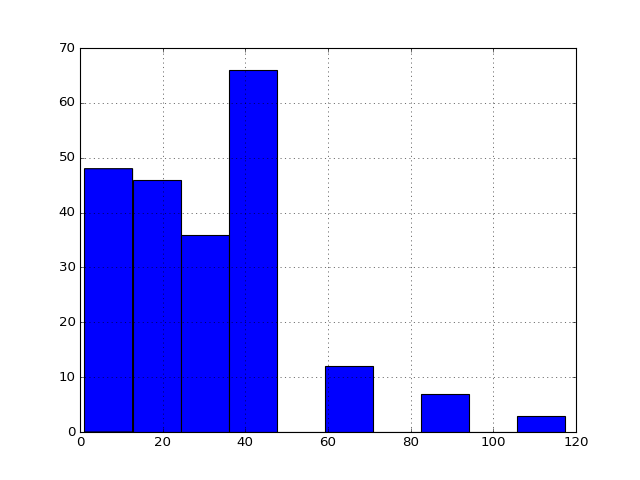

In [13]:
df.Mn[df.Mn.apply(complement(partial(flip(isinstance), str)))].hist()

In [12]:
def try_excel(the_file):
    try:
        return pd.read_excel(the_file)
    except:
        return None
df = Chain(rootdir+'**/*.xlsx')[glob].filter(
    lambda x: complement('~' in x)
).map(try_excel).filter(
    lambda x: isinstance(x, pd.DataFrame)
).list()[partial(pd.concat, axis=1)].value().transpose().reset_index()
df.columns = df.iloc[0].values
df = df.iloc[1:].copy()
df

,Author,Year,DOI,Mn,Mw,PDI,RR,InitConc,Solv1,Solv2,...,ElectrodeMat,Depo,Notes,SonicationTime,nan,nan,nan,nan,nan,nan
1,Aiyar,2011,10.1002/adfm.201002729,24,47.7,1.9875,93,4,CHCl3,NaN,...,Au,SPUN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Aiyar .1,2011,10.1002/adfm.201002729,24,47.7,1.9875,93,4,CHCl3,NaN,...,Au,SPUN,NaN,0.5,NaN,NaN,NaN,NaN,NaN,NaN
3,Aiyar .2,2011,10.1002/adfm.201002729,24,47.7,1.9875,93,4,CHCl3,NaN,...,Au,SPUN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN
4,Aiyar .3,2011,10.1002/adfm.201002729,24,47.7,1.9875,93,4,CHCl3,NaN,...,Au,SPUN,NaN,2.5,NaN,NaN,NaN,NaN,NaN,NaN
5,Aiyar .4,2011,10.1002/adfm.201002729,24,47.7,1.9875,93,4,CHCl3,NaN,...,Au,SPUN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN
6,Aiyar .5,2011,10.1002/adfm.201002729,24,47.7,1.9875,93,4,CHCl3,NaN,...,Au,SPUN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN
7,Aiyar .6,2011,10.1002/adfm.201002729,24,47.7,1.9875,93,4,CHCl3,NaN,...,Au,SPUN,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN
8,Author,Year,DOI,Mn,Mw,PDI,RR,InitConc,Solv1,Solv2,...,ElectrodeMat,Depo,Notes,SonicationTime,NaN,NaN,NaN,NaN,NaN,NaN
9,Aiyar,2013,10.1021/am3027822,24,47.7,NaN,94,3.5,CHCl3,NaN,...,Au,SPUN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN
10,Aiyar .1,2013,10.1021/am3027822,24,47.7,NaN,94,3.5,CHCl3,NaN,...,Au,DIPPED,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
df

,Author,Year,DOI,Mn,Mw,PDI,RR,InitConc,Solv1,Solv2,...,ElectrodeMat,Depo,Notes,SonicationTime,nan,nan,nan,nan,nan,nan
0,Author,Year,DOI,Mn,Mw,PDI,RR,InitConc,Solv1,Solv2,...,ElectrodeMat,Depo,Notes,SonicationTime,NaN,NaN,NaN,NaN,NaN,NaN
1,Aiyar,2011,10.1002/adfm.201002729,24,47.7,1.9875,93,4,CHCl3,NaN,...,Au,SPUN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Aiyar .1,2011,10.1002/adfm.201002729,24,47.7,1.9875,93,4,CHCl3,NaN,...,Au,SPUN,NaN,0.5,NaN,NaN,NaN,NaN,NaN,NaN
3,Aiyar .2,2011,10.1002/adfm.201002729,24,47.7,1.9875,93,4,CHCl3,NaN,...,Au,SPUN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN
4,Aiyar .3,2011,10.1002/adfm.201002729,24,47.7,1.9875,93,4,CHCl3,NaN,...,Au,SPUN,NaN,2.5,NaN,NaN,NaN,NaN,NaN,NaN
5,Aiyar .4,2011,10.1002/adfm.201002729,24,47.7,1.9875,93,4,CHCl3,NaN,...,Au,SPUN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN
6,Aiyar .5,2011,10.1002/adfm.201002729,24,47.7,1.9875,93,4,CHCl3,NaN,...,Au,SPUN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN
7,Aiyar .6,2011,10.1002/adfm.201002729,24,47.7,1.9875,93,4,CHCl3,NaN,...,Au,SPUN,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN
8,Author,Year,DOI,Mn,Mw,PDI,RR,InitConc,Solv1,Solv2,...,ElectrodeMat,Depo,Notes,SonicationTime,NaN,NaN,NaN,NaN,NaN,NaN
9,Aiyar,2013,10.1021/am3027822,24,47.7,NaN,94,3.5,CHCl3,NaN,...,Au,SPUN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
@curry
def f(x,y):
    return x*y

In [31]:
g = f(4)

In [32]:
g(5)

20

In [33]:
h = flip(f)

In [34]:
import toolz.curried

In [ ]:
getattr()

In [ ]:
toolz.curried

In [ ]:
f(5)

In [30]:
partial(f, y=2)(3)

6

In [43]:
from sklearn.datasets import load_iris
from sklearn.decomposition import FastICA, RandomizedPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [44]:
models = [FastICA(), RandomizedPCA(), LinearDiscriminantAnalysis()]

In [45]:
X, y = load_iris()['data'], load_iris()['target']

In [48]:
first(models).fit_transform

<bound method FastICA.fit_transform of FastICA(algorithm='parallel', fun='logcosh', fun_args=None, max_iter=200,
    n_components=None, random_state=None, tol=0.0001, w_init=None,
    whiten=True)>

In [71]:
Chain(models).map(partial(flip(getattr), 'fit_transform')).juxt().value()(X, y)

(array([[ -2.15441172e-02,   3.33251425e-02,  -3.08248008e-04,
          -1.13428069e-01],
        [ -2.99817580e-02,  -7.72227617e-02,   9.57267451e-03,
          -1.09120142e-01],
        [  3.01098903e-02,  -2.50791707e-02,   1.45308927e-02,
          -1.10452920e-01],
        [  7.23226478e-02,  -2.70193891e-02,  -2.47582382e-02,
          -9.92310768e-02],
        [  1.56703234e-02,   6.35678700e-02,  -7.57827079e-03,
          -1.11773935e-01],
        [ -2.23682204e-02,   1.23049885e-01,   2.20052646e-02,
          -1.02126216e-01],
        [  8.59701374e-02,   3.01357448e-02,   2.59834983e-02,
          -1.02630160e-01],
        [  6.33140728e-03,   2.30430600e-02,  -2.00991151e-02,
          -1.06847272e-01],
        [  8.50619977e-02,  -7.26091462e-02,  -5.84518104e-03,
          -9.99926214e-02],
        [  3.72305077e-03,  -3.66445475e-02,  -5.51239009e-02,
          -1.06292292e-01],
        [ -5.96598332e-02,   7.31055091e-02,  -1.54399921e-02,
          -1.14463467e-01],

In [70]:
f

(array([[ -3.35746481e-02,   9.90027145e-04,   2.14234889e-02,
          -1.13373423e-01],
        [  7.69162066e-02,  -8.82670955e-03,   3.07073544e-02,
          -1.09197743e-01],
        [  2.52170145e-02,  -1.40380632e-02,  -2.97445572e-02,
          -1.10584181e-01],
        [  2.74586065e-02,   2.50254270e-02,  -7.21079808e-02,
          -9.91997064e-02],
        [ -6.35449467e-02,   8.09063854e-03,  -1.60422679e-02,
          -1.11698267e-01],
        [ -1.23283607e-01,  -2.14250168e-02,   2.16628523e-02,
          -1.02119777e-01],
        [ -2.95741332e-02,  -2.57781876e-02,  -8.59725453e-02,
          -1.02843069e-01],
        [ -2.30916511e-02,   2.06409409e-02,  -6.46033290e-03,
          -1.06725698e-01],
        [  7.31488154e-02,   6.08952501e-03,  -8.44368187e-02,
          -1.00114505e-01],
        [  3.65595453e-02,   5.57014533e-02,  -3.55115486e-03,
          -1.06026019e-01],
        [ -7.36419087e-02,   1.62564548e-02,   5.91873150e-02,
          -1.14251689e-01],

In [55]:
results = pipe(
    models,
    map(partial(flip(getattr), 'fit_transform')),
    juxt,
)(X, y)
pipe(results, map(lambda x: x.shape), list)

[(150, 4), (150, 4), (150, 2)]

In [54]:
X.shape

(150, 4)

In [ ]:
juxt(map(partial(flip(getattr), 'fit_transform'), models))

In [ ]:
map()

In [85]:
Chain(rootdir+'**/*.xlsx')[glob].map(pd.read_excel).list()[partial(pd.concat, axis=1)].value().transpose()

XLRDError: Unsupported format, or corrupt file: Expected BOF record; found b'\x0cNils Pe'

In [18]:
pipe(
    rootdir+'**/*.xlsx', glob,
    map(pd.read_excel),list,
    partial(pd.concat, axis=1)
)

XLRDError: Unsupported format, or corrupt file: Expected BOF record; found b'\x0cNils Pe'

In [19]:
type(glob(rootdir+'**/*.xlsx'))

list

In [3]:
import pandas as pd
import numpy as np
import os

rootdir = '/Users/Imperssonator/Dropbox/OFET Fab Table/OFET-Database-master/Papers/'

df = pd.DataFrame()

for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        if file[-4:] == 'xlsx':
            dfi = pd.read_excel(os.path.join(subdir,file),index_col=0,header=None)
            dfi = dfi.transpose()
            df = df.append(dfi)
            print(file)


Aiyar 2011.xlsx
Aiyar 2013.xlsx
Bielecka 2011.xlsx
Chang 2004.xlsx
Chang 2006.xlsx
Chang 2013.xlsx
Chang 2014.xlsx
Cho 2006.xlsx
Choi 2014.xlsx
FullFact 2016.xlsx
Jiang 2011.xlsx
Kleinhenz 2016.xlsx
Kline 2003.xlsx
Kline 2005.xlsx
Newbloom 2011.xlsx
Park 2014.xlsx
Park,Ko 2014.xlsx
Scharsich 2012.xlsx
SprayCool 2016.xlsx
Surin 2006.xlsx
VarAge 2016.xlsx
Verilhac 2006.xlsx
Zen 2004.xlsx
Zhao 2013.xlsx


In [4]:
df

,AgeTemp,AgeTime,AnnCool,AnnTemp,AnnTime,Author,BP,BladeH,BladeVel,CastCond,...,SprayTime,SubsTreat,UVTime,VFSolv1,VT,Vds,Vt,WtPer,Year,subslope
1,NaN,NaN,NaN,NaN,NaN,Aiyar,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-3,NaN,NaN,2011,NaN
2,NaN,NaN,NaN,NaN,NaN,Aiyar,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-3,NaN,NaN,2011,NaN
3,NaN,NaN,NaN,NaN,NaN,Aiyar,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-3,NaN,NaN,2011,NaN
4,NaN,NaN,NaN,NaN,NaN,Aiyar,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-3,NaN,NaN,2011,NaN
5,NaN,NaN,NaN,NaN,NaN,Aiyar,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-3,NaN,NaN,2011,NaN
6,NaN,NaN,NaN,NaN,NaN,Aiyar,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-3,NaN,NaN,2011,NaN
7,NaN,NaN,NaN,NaN,NaN,Aiyar,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-3,NaN,NaN,2011,NaN
1,NaN,NaN,NaN,110,10,Aiyar,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-3,NaN,NaN,2013,NaN
2,NaN,NaN,NaN,110,10,Aiyar,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-3,NaN,NaN,2013,NaN
3,NaN,NaN,NaN,110,10,Aiyar,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-3,NaN,NaN,2013,NaN


In [6]:
import qgrid
qgrid.show_grid(df,grid_options={'forceFitColumns':False, 'defaultColumnWidth':80})